## Introducción a PyTorch (Parte 6)

<a target="_blank" href="https://colab.research.google.com/github/pglez82/DeepLearningWeb/blob/master/labs/notebooks/Introducci%C3%B3n%20a%20PyTorch%20(Parte%206).ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

En esta práctica vamos a explicar diferentes elementos de PyTorch que nos permitirán crear arquitecturas de redes neuronales profundas complejas. En particular veremos:
- Capas convolucionales
- Capas de pooling
- Capas para transformers
- Capas de dropout
- Capas de normalización
- Funciones de activación
- Funciones de pérdida

En general, toda la información acerca de las capas implementadas en PyTorch para poder crear arquitecturas personalizadas de redes neuronales profundas se encuentra bajo el paquete `torch.nn`. Puedes consultar toda la documentación en la siguiente [página](https://pytorch.org/docs/stable/nn.html).

En este notebook trataremos las capas más importantes.


### Capas convolucionales
Estas capas son la base de las redes convolucionales. Las tres principales son las siguientes: 
- `torch.nn.Conv1d`
- `torch.nn.Conv2d`
- `torch.nn.Conv3d`

Se trata de capas convolucionales de 1D, 2D y 3D, respectivamente, utilizadas para procesar datos de entrada con diferentes dimensiones. Realizan convoluciones sobre la entrada y aplican un conjunto de filtros aprendidos para extraer características relevantes.

### Capas de pooling
Estas capas son útiles para reducir la dimensión espacial dentro de una red neuronal.
- `torch.nn.MaxPool1d`, `torch.nn.MaxPool2d`, `torch.nn.MaxPool3d`: Estas capas realizan un max pooling de los datos de entrada, reduciendo las dimensiones espaciales y extrayendo las características más destacadas.
- `torch.nn.AvgPool1d`, `torch.nn.AvgPool2d`, `torch.nn.AvgPool3d`: Estas capas realizan un pooling medio sobre los datos de entrada, calculando el valor medio de cada ventana de pooling.

Veamos un ejemplo de red convolucional para **imagenes de 1x3x3**, utilizando capas convolucionales y de pooling:

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Suponemos
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=2, stride=1, padding=1)
        self.maxpool=nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc = nn.Linear(2*2*8, 10) 

    def forward(self, x):
        out = self.conv(x)
        out = F.relu(out)
        out = self.maxpool(out)
        out = out.reshape(out.size(0), -1)
        logits = self.fc(out)
        return logits

# Creamos el modelo
model = CNN()

# Imprimir la arquitectura
print(model)

# Crear una imagen de prueba
image = torch.randn((1,1,3,3))
print(model(image))

CNN(
  (conv): Conv2d(1, 8, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
  (maxpool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc): Linear(in_features=32, out_features=10, bias=True)
)
tensor([[ 0.1225,  0.2868, -0.5401,  0.4282,  0.1701,  0.3338,  0.6502, -0.7961,
          1.2431, -0.0821]], grad_fn=<AddmmBackward0>)


Vamos a explicar esta arquitectura paso por paso:
- La capa convolucional hace una convolución en 2 dimensiones de la imagen de entrada. Suponiendo que las dimensiones de ésta son 1x4x4, y suponiendo los siguientes parámetros de la convolución:
  -  un kernel de 2x2
  -  un padding de 1
  -  un stride de 1
  -  8 canales de salida
  
  Las dimensiones de salida de esta capa serán 8x4x4 (8 canales de salida con dimensión 3+1+1-2+1=4).

  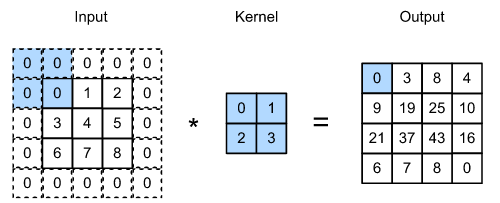)

- La capa MaxPool2d calcula el máximo con un kernel de 2x2, usando un stride (desplazamiento) de 2 pixeles. Esto nos dará una dimensión de salida de 8x2x2.
- Por último la capa totalmente conectada (`Linear`), transforma la salida de las capas anteriores en 10 neuronas de salida (suponiendo por ejemplo que nuestro problema tiene 10 clases).

### Capas para transformers
- `torch.nn.Transformer`. Clase de alto nivel en PyTorch para representar una arquitectura completa de transformer. A través de sus parámetros como por ejemplo `nhead`, `dropout` o `activation`, podemos configurar la arquitectura para nuestro problema. Consulta la siguiente [página](https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html) para conocer todos sus atributos.
- `torch.nn.MultiheadAttention`. En el caso de querer solamente el mecanismo de self-attention y no el transformer completo podremos usar esta clase.

### Capas de dropout
`torch.nn.Dropout`, `torch.nn.Dropout2d`, `torch.nn.Dropout3d`. Según las dimensiones del tensor de entrada. Todas ellas tienen un atributo `p` para controlar el porcentaje de conexiones de se desactivarán en una iteración dada.

### Capas de normalización
`torch.nn.BatchNorm1d`, `torch.nn.BatchNorm2d` y `torch.nn.BatchNorm3d`. Capas para realizar batch-normalization (revisa la teoría si es necesario para entender como funcionan estas capas).

### Funciones de activación
PyTorch incorpora las funciones de activación más importantes. Algunas de ellas son: `torch.nn.ReLU`, `torch.nn.LeakyReLU`, `torch.nn.Sigmoid` y `torch.nn.Tanh`.

### Funciones de pérdida
En cuanto a funciones de pérdida, también tenemos las más comunes ya implementadas en PyTorch. Aquí van algunos ejemplos:

- Funciones adecuadas para problemas de regresión:
    - `torch.nn.MSELoss` (Mean Squared Error).
    - `torch.nn.L1Loss` (Mean Absolute Error).

- Funciones de pérdida para clasificación:
    - `torch.nn.CrossEntropyLoss`. CrossEntropyLoss. Es importante saber que esta función ya incluye la operación softmax por tanto debemos pasarle directamente la salida de la última capa lineal de nuestra red (logits).
    - `torch.nn.BCELoss` (Binary Cross Entropy). 
    - `torch.nn.BCEWithLogitsLoss`. Lo mismo que la anterior pero aplica una sigmoide a los datos de entrada.

### Ejercicios
1. Crea una arquitectura de red convolucional con dos capas convolucionales para imágenes del estilo a MNIST (1x28x28). 
2. Prueba a entrenar esta red en este conjunto. ¿Funciona mejor que una red totalmente conectada?